In [ ]:
# pip install funcsigs

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import recmetrics

#### including columns which has rating > 3

In [ ]:
ratings = pd.read_csv('ratings.csv')
ratings = ratings.query('rating >=3')
ratings.reset_index(drop=True, inplace=True)

In [ ]:
unique_ratings = ratings['rating'].unique()
print(unique_ratings)


[4.  5.  3.  4.5 3.5]


#### considering ratings from users who have rated over n movies

In [ ]:
n=1000
users = ratings["userId"].value_counts()
users = users[users>n].index.tolist()

In [ ]:
users

[414, 474, 610, 599, 380, 448, 274]

In [ ]:
ratings = ratings.query('userId in @users')
print(ratings.shape)
ratings.head(3)

(9333, 4)


,userId,movieId,rating,timestamp
32731,274,1,4.0,1171410158
32732,274,2,3.5,1171934785
32733,274,6,4.0,1197022122


In [ ]:
ratings

,userId,movieId,rating,timestamp
32731,274,1,4.0,1171410158
32732,274,2,3.5,1171934785
32733,274,6,4.0,1197022122
32734,274,8,3.0,1172030892
32735,274,10,4.0,1171428459
...,...,...,...,...
81758,610,166534,4.0,1493848402
81759,610,168248,5.0,1493850091
81760,610,168250,5.0,1494273047
81761,610,168252,5.0,1493846352


#### forming movieid as rows and genres as features

In [ ]:
rated_movies = ratings["movieId"].tolist()

movies = pd.read_csv('movies.csv')
movies = movies.query('movieId in @rated_movies')
movies.set_index("movieId", inplace=True, drop=True)

movies = movies["genres"].str.split("|", expand=True)
movies.reset_index(inplace=True)
movies = pd.melt(movies, id_vars='movieId', value_vars=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

movies.drop_duplicates("movieId", inplace=True)
movies.set_index('movieId', inplace=True)

movies = pd.get_dummies(movies.value)
movies.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
movies

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183301,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
184471,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
187593,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### unique movie IDs are 9742

#### long tail plot

In [ ]:
# only a small percentage of items have a high volume of interactions, and this is referred to as
# the “head”. Most items are in the “long tail”, but they only make up a small percentage of
# interactions.

C:\Users\Supriya\Documents\BIG DATA\Project\ml-latest-small\ml-latest-small\recmetrics\plots.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  head = head.append(tail.head(1))


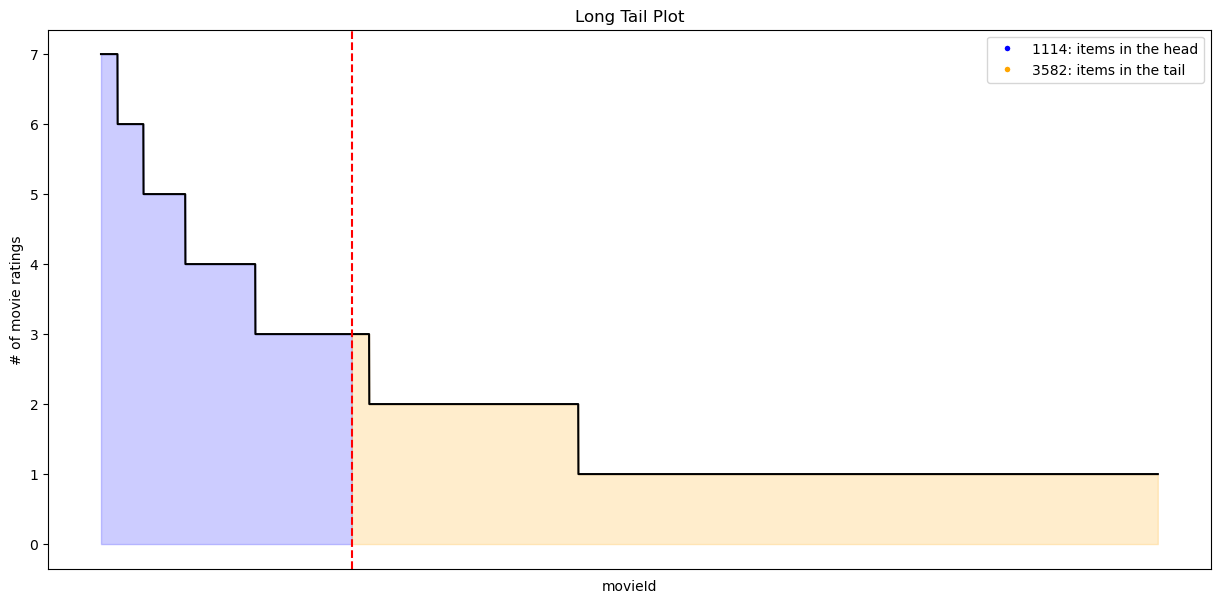

In [ ]:
fig = plt.figure(figsize=(15, 7))
recmetrics.long_tail_plot(df=ratings,
             item_id_column="movieId",
             interaction_type="movie ratings",
             percentage=0.5,
             x_labels=False)

#### collaborative filter recommender using SVD approach in surprise package

In [ ]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
reader = Reader(rating_scale=(0, 5))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.25)

#### SVD is used to train the data

In [ ]:
algo = SVD()
algo.fit(trainset)

#### Make predictions on SVD test set

In [ ]:
test = algo.test(testset)
test = pd.DataFrame(test)
test.drop("details", inplace=True, axis=1)
test.columns = ['userId', 'movieId', 'actual', 'cf_predictions']
test.head()

,userId,movieId,actual,cf_predictions
0,414,71745,4.0,3.754796
1,380,1674,3.0,4.037460
2,474,36537,3.5,3.688956
3,414,111759,4.0,3.708929
4,414,32587,4.0,3.986298


In [ ]:
test

,userId,movieId,actual,cf_predictions
0,414,71745,4.0,3.754796
1,380,1674,3.0,4.037460
2,474,36537,3.5,3.688956
3,414,111759,4.0,3.708929
4,414,32587,4.0,3.986298
...,...,...,...,...
2329,474,535,4.0,3.657228
2330,274,3786,3.5,3.571948
2331,274,1345,3.5,3.576147
2332,414,5137,5.0,3.720050


#### evaluationg mse and rmse on actual and predicted test sets

In [ ]:
print("MSE: ", recmetrics.mse(test.actual, test.cf_predictions))
print("RMSE: ", recmetrics.rmse(test.actual, test.cf_predictions))

MSE:  0.3617320247621284
RMSE:  0.6014416220732719


In [ ]:
#create model (matrix of predicted values)
cf_model = test.pivot_table(index='userId', columns='movieId', values='cf_predictions').fillna(0)

In [ ]:
def get_users_predictions(user_id, n, model):
    recommended_items = pd.DataFrame(model.loc[user_id])
    recommended_items.columns = ["predicted_rating"]
    recommended_items = recommended_items.sort_values('predicted_rating', ascending=False)
    recommended_items = recommended_items.head(n)
    return recommended_items.index.tolist()

In [ ]:
#get example prediction
get_users_predictions(274, 5135, cf_model)

[2716,
 2959,
 1221,
 260,
 1196,
 1136,
 293,
 2571,
 4993,
 2076,
 3114,
 589,
 923,
 5952,
 1214,
 3793,
 3994,
 1393,
 1073,
 1199,
 1967,
 750,
 2700,
 1222,
 6333,
 1527,
 10,
 32,
 70,
 6664,
 3082,
 3000,
 1407,
 1968,
 1704,
 4979,
 2324,
 799,
 60291,
 46578,
 4306,
 1676,
 1266,
 377,
 50872,
 33672,
 4034,
 1240,
 8360,
 45728,
 33834,
 4386,
 671,
 2013,
 1282,
 81932,
 40815,
 1961,
 27311,
 51540,
 48394,
 27788,
 4855,
 40278,
 1717,
 1265,
 1218,
 4366,
 60756,
 1639,
 6377,
 2115,
 4744,
 3362,
 181,
 4886,
 82459,
 68358,
 3421,
 7445,
 3969,
 223,
 4821,
 175,
 64839,
 53000,
 1779,
 1193,
 1580,
 68952,
 2231,
 328,
 1721,
 6764,
 54881,
 6755,
 44665,
 4167,
 7802,
 40819,
 3752,
 5956,
 4974,
 428,
 5110,
 2712,
 2000,
 1345,
 5219,
 1515,
 32017,
 53127,
 1175,
 7930,
 31909,
 3799,
 52435,
 52328,
 2605,
 7646,
 8225,
 2688,
 2699,
 2799,
 7321,
 43549,
 42725,
 2946,
 1005,
 2052,
 31193,
 4005,
 3786,
 765,
 1848,
 1499,
 72129,
 1431,
 1862,
 1863,
 3979,
 6

In [ ]:
test = test.copy().groupby('userId', as_index=False)['movieId'].agg({'actual': (lambda x: list(set(x)))})

In [ ]:
test = test.set_index("userId")

In [ ]:
# make recommendations for all members in the test data
cf_recs = [] = []
for user in test.index:
    cf_predictions = get_users_predictions(user, 10, cf_model)
    cf_recs.append(cf_predictions)

test['cf_predictions'] = cf_recs
test.head()

,actual,cf_predictions
userId,,
274,"[2, 2052, 519, 6664, 8, 10, 2571, 12, 81932, 4...","[2716, 2959, 1221, 260, 1196, 1136, 293, 2571,..."
380,"[54272, 1, 69122, 1027, 2052, 1028, 2053, 1044...","[318, 1, 60069, 104457, 750, 3624, 3676, 1136,..."
414,"[122882, 3, 6, 4103, 69640, 7, 6157, 2077, 122...","[1196, 7153, 112852, 1967, 1036, 3527, 1228, 9..."
448,"[54272, 115713, 2050, 3, 6662, 6663, 101895, 9...","[2858, 1079, 1221, 1206, 1210, 6333, 2987, 158..."
474,"[2, 4103, 2064, 16, 4113, 2070, 24, 28, 4126, ...","[1200, 1967, 720, 2716, 1208, 1080, 1036, 4993..."


#### popularity recommender-- which recommends top 10 movies to every user

In [ ]:
#make recommendations for all members in the test data
popularity_recs = ratings.movieId.value_counts().head(10).index.tolist()

pop_recs = []
for user in test.index:
    pop_predictions = popularity_recs
    pop_recs.append(pop_predictions)

test['pop_predictions'] = pop_recs
test.head()

,actual,cf_predictions,pop_predictions
userId,,,
274,"[2, 2052, 519, 6664, 8, 10, 2571, 12, 81932, 4...","[2716, 2959, 1221, 260, 1196, 1136, 293, 2571,...","[1, 480, 608, 3033, 593, 592, 589, 3578, 3793,..."
380,"[54272, 1, 69122, 1027, 2052, 1028, 2053, 1044...","[318, 1, 60069, 104457, 750, 3624, 3676, 1136,...","[1, 480, 608, 3033, 593, 592, 589, 3578, 3793,..."
414,"[122882, 3, 6, 4103, 69640, 7, 6157, 2077, 122...","[1196, 7153, 112852, 1967, 1036, 3527, 1228, 9...","[1, 480, 608, 3033, 593, 592, 589, 3578, 3793,..."
448,"[54272, 115713, 2050, 3, 6662, 6663, 101895, 9...","[2858, 1079, 1221, 1206, 1210, 6333, 2987, 158...","[1, 480, 608, 3033, 593, 592, 589, 3578, 3793,..."
474,"[2, 4103, 2064, 16, 4113, 2070, 24, 28, 4126, ...","[1200, 1967, 720, 2716, 1208, 1080, 1036, 4993...","[1, 480, 608, 3033, 593, 592, 589, 3578, 3793,..."


#### random recommender-- recommends 10 movies to every user in random

In [ ]:
#make recommendations for all members in the test data

ran_recs = []
for user in test.index:
    random_predictions = ratings.movieId.sample(10).values.tolist()
    ran_recs.append(random_predictions)

test['random_predictions'] = ran_recs
test.head()

,actual,cf_predictions,pop_predictions,random_predictions
userId,,,,
274,"[2, 2052, 519, 6664, 8, 10, 2571, 12, 81932, 4...","[2716, 2959, 1221, 260, 1196, 1136, 293, 2571,...","[1, 480, 608, 3033, 593, 592, 589, 3578, 3793,...","[2490, 1359, 8019, 3301, 3317, 5222, 3763, 837..."
380,"[54272, 1, 69122, 1027, 2052, 1028, 2053, 1044...","[318, 1, 60069, 104457, 750, 3624, 3676, 1136,...","[1, 480, 608, 3033, 593, 592, 589, 3578, 3793,...","[2916, 54999, 4121, 1527, 26662, 51931, 40815,..."
414,"[122882, 3, 6, 4103, 69640, 7, 6157, 2077, 122...","[1196, 7153, 112852, 1967, 1036, 3527, 1228, 9...","[1, 480, 608, 3033, 593, 592, 589, 3578, 3793,...","[3889, 4005, 44694, 127204, 2353, 4979, 1970, ..."
448,"[54272, 115713, 2050, 3, 6662, 6663, 101895, 9...","[2858, 1079, 1221, 1206, 1210, 6333, 2987, 158...","[1, 480, 608, 3033, 593, 592, 589, 3578, 3793,...","[750, 2746, 33794, 27820, 480, 1569, 166534, 9..."
474,"[2, 4103, 2064, 16, 4113, 2070, 24, 28, 4126, ...","[1200, 1967, 720, 2716, 1208, 1080, 1036, 4993...","[1, 480, 608, 3033, 593, 592, 589, 3578, 3793,...","[79702, 88163, 3397, 3704, 1785, 1125, 114627,..."


#### recall

In [ ]:
actual = test.actual.values.tolist()
cf_predictions = test.cf_predictions.values.tolist()
pop_predictions = test.pop_predictions.values.tolist()
random_predictions = test.random_predictions.values.tolist()

In [ ]:
pop_mark = []
for K in np.arange(1, 11):
    pop_mark.extend([recmetrics.mark(actual, pop_predictions, k=K)])
pop_mark

[0.0010837382015671264,
 0.0024172266528845027,
 0.0024172266528845027,
 0.002501458458814422,
 0.0029464156110886467,
 0.0032429332170394115,
 0.003456692990013205,
 0.003775714871776373,
 0.004054605020554998,
 0.004286893057721084]

In [ ]:
random_mark = []
for K in np.arange(1, 11):
    random_mark.extend([recmetrics.mark(actual, random_predictions, k=K)])
random_mark

[0.0005030181086519115,
 0.0010183020811849546,
 0.0010183020811849546,
 0.0010183020811849546,
 0.001419309524445919,
 0.001419309524445919,
 0.001419309524445919,
 0.001419309524445919,
 0.0015373245123493828,
 0.0015373245123493828]

In [ ]:
cf_mark = []
for K in np.arange(1, 11):
    cf_mark.extend([recmetrics.mark(actual, cf_predictions, k=K)])
cf_mark

[0.0032039101627272244,
 0.006407820325454449,
 0.009611730488181671,
 0.012815640650908898,
 0.01601955081363612,
 0.019223460976363342,
 0.02242737113909057,
 0.025631281301817795,
 0.028835191464545017,
 0.03203910162727224]

#### mark plot(mean average recall at K)

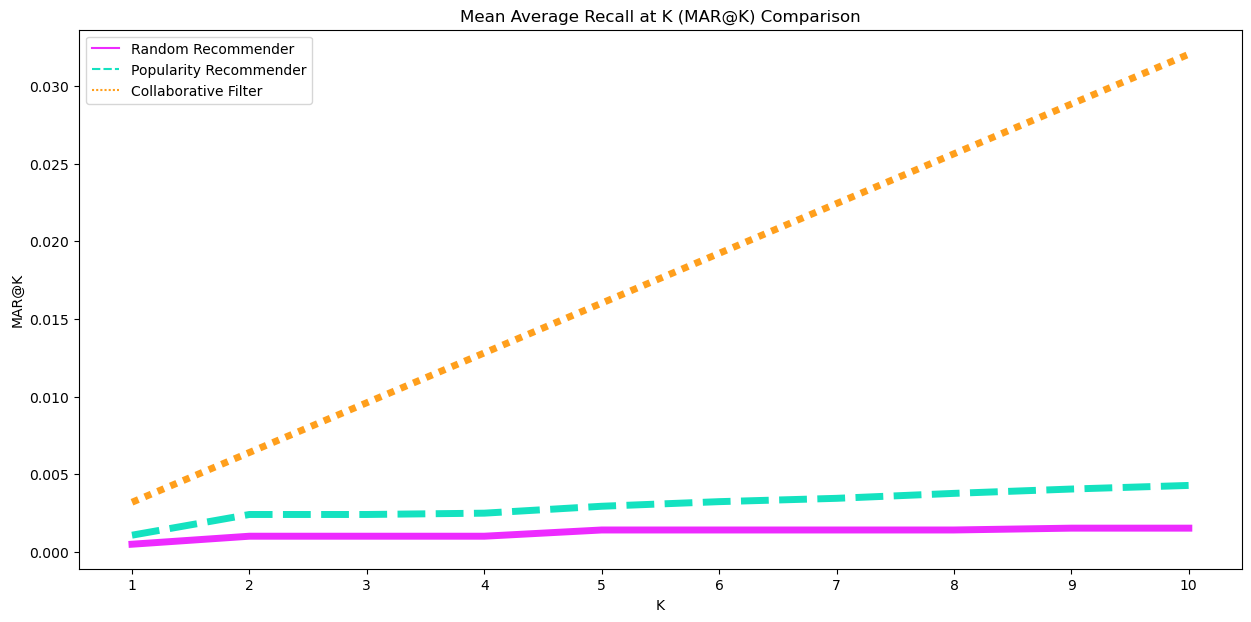

In [ ]:
mark_scores = [ random_mark,pop_mark, cf_mark]
index = range(1,10+1)
names = [ 'Random Recommender', 'Popularity Recommender', 'Collaborative Filter']

fig = plt.figure(figsize=(15, 7))
recmetrics.mark_plot(mark_scores, model_names=names, k_range=index)

#### prediction coverage

#### Coverage is the percent of unique items that are atleast recommended once recommender in the training data the model is able to recommend on a test set

In [ ]:
catalog = ratings.movieId.unique().tolist()
pop_coverage = recmetrics.prediction_coverage(pop_recs, catalog)
cf_coverage = recmetrics.prediction_coverage(cf_recs, catalog)

#### catalog coverage-- for selcted n it assess the fraction of unique movies recommended at least once across those observed lists.

In [ ]:
# N=100 observed recommendation lists
pop_cat_coverage = recmetrics.catalog_coverage(pop_recs, catalog, 100)
cf_cat_coverage = recmetrics.catalog_coverage(cf_recs, catalog, 100)

#### coverage plot

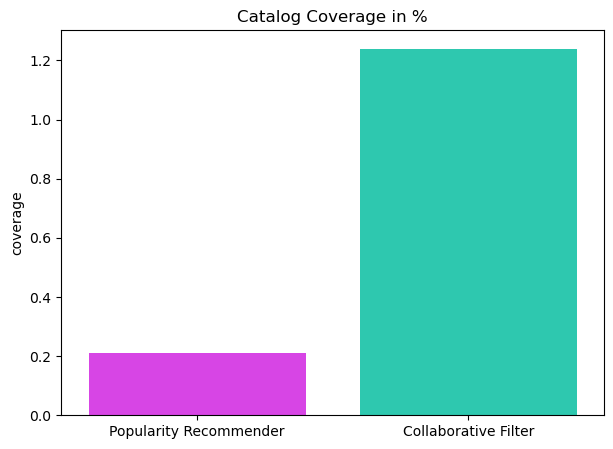

In [ ]:
# plot of prediction coverage
coverage_scores = [  pop_coverage, cf_coverage]
model_names = [ 'Popularity Recommender', 'Collaborative Filter']

fig = plt.figure(figsize=(7, 5))
recmetrics.coverage_plot(coverage_scores, model_names)

#### novelty--efers to recommending diverse or less mainstream items that a user might not have encountered before. High novelty means suggesting unique or less popular items

In [ ]:
nov = ratings.movieId.value_counts()
pop = dict(nov)

In [ ]:
pop_novelty,pop_mselfinfo_list = recmetrics.novelty(pop_recs, pop, len(users), 10)
cf_novelty,cf_mselfinfo_list = recmetrics.novelty(cf_recs, pop, len(users), 10)

In [ ]:
print( pop_novelty, cf_novelty)

0.0 0.2755203412689323
